In [1]:
library(readr)
library(dplyr)
library(mechkar)

Warning message:
"package 'dplyr' was built under R version 4.0.2"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [21]:
df <- read_csv("C:/Users/Thomas/Documents/HIT/DM/data/countries.csv")
head(df)

Warning message:
"Missing column names filled in: 'X1' [1]"
Parsed with column specification:
cols(
  .default = col_double(),
  country = col_character(),
  continent = col_character(),
  region = col_character(),
  pop_change = col_character(),
  unemployment_last_period = col_character(),
  unemployment_range = col_character(),
  data_date = col_character()
)

See spec(...) for full column specifications.



X1,country,continent,region,pop2018,pop2019,pop_change,rank,age_avg,male_age,...,wine_production_ton,alcohol_consumption,alcohol_reported,alcohol_unreported,beer_pct,wine_pct,spirits_pct,other_pct,alcohol_projection_2015,temperature_avg
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,China,Asia,Eastern Asia,1427647786,1433783686,+0.4%,67,37.4,36.5,...,1700000,6.7,5.0,1.7,27.8,3.0,69.2,0.0,7.6,6.95
2,India,Asia,Southern Asia,1352642280,1366417754,+1.0%,141,28.1,27.2,...,NA,4.3,2.2,2.2,6.8,0.1,93.1,0.0,4.6,23.65
3,United States,Americas,Northern America,327096265,329064917,+0.6%,61,38.1,36.8,...,3300000,9.2,8.7,0.5,50.0,17.3,32.7,0.0,9.0,47.39
4,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.1%,117,30.2,29.6,...,NA,0.6,0.1,0.5,84.5,0.1,15.3,0.0,0.6,25.85
5,Pakistan,Asia,Southern Asia,212228286,216565318,+2.0%,168,23.8,23.7,...,NA,0.1,0.0,0.0,1.2,3.0,0.1,0.1,NA,20.20
6,Brazil,Americas,South America,209469323,211049527,+0.8%,103,32.6,31.1,...,273100,8.7,7.2,1.5,59.6,4.0,36.3,0.1,9.1,24.95


In [3]:
dim(df)

[1] 236  40

In [4]:
summary(df)

       X1           country           continent            region         
 Min.   :  1.00   Length:236         Length:236         Length:236        
 1st Qu.: 59.75   Class :character   Class :character   Class :character  
 Median :118.50   Mode  :character   Mode  :character   Mode  :character  
 Mean   :118.50                                                           
 3rd Qu.:177.25                                                           
 Max.   :236.00                                                           
                                                                          
    pop2018             pop2019           pop_change             rank      
 Min.   :8.010e+02   Min.   :7.990e+02   Length:236         Min.   :  1.0  
 1st Qu.:4.450e+05   1st Qu.:4.460e+05   Class :character   1st Qu.: 60.0  
 Median :5.637e+06   Median :5.652e+06   Mode  :character   Median :116.0  
 Mean   :6.572e+07   Mean   :6.643e+07                      Mean   :116.2  
 3rd Qu.:2.276e+07  

In [22]:
getMissingness(df)

list(var = c("wine_production_ton", "water_resources_km2", "data_date", "unemployment_lat", "unemployment_last_period", "unemployment_previous", "unemployment_range", "atbirth2", "alcohol_projection_2015", "temperature_avg"), na_count = c(162, 85, 73, 60, 60, 60, 60, 57, 57, 51), rate = c(68.6, 36, 30.9, 25.4, 25.4, 25.4, 25.4, 24.2, 24.2, 21.6))This dataset has 61 (25.8%) complete rows. Original data has 236 rows.



var,na_count,rate
<chr>,<dbl>,<dbl>
wine_production_ton,162,68.6
water_resources_km2,85,36.0
data_date,73,30.9
unemployment_lat,60,25.4
unemployment_last_period,60,25.4
unemployment_previous,60,25.4
unemployment_range,60,25.4
atbirth2,57,24.2
alcohol_projection_2015,57,24.2


## Feature transformation for highly missing variables and for Missing not at random (MNAR) variables

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
     49    7730   38000  397808  199448 4796900     162 

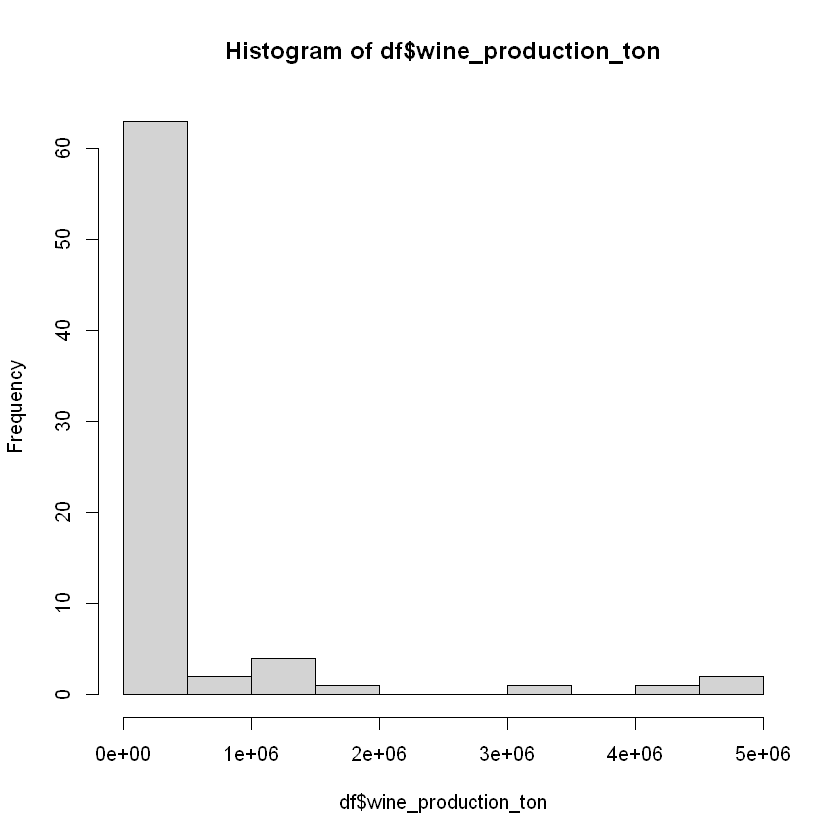

In [23]:
## wine production
summary(df$wine_production_ton)
hist(df$wine_production_ton)

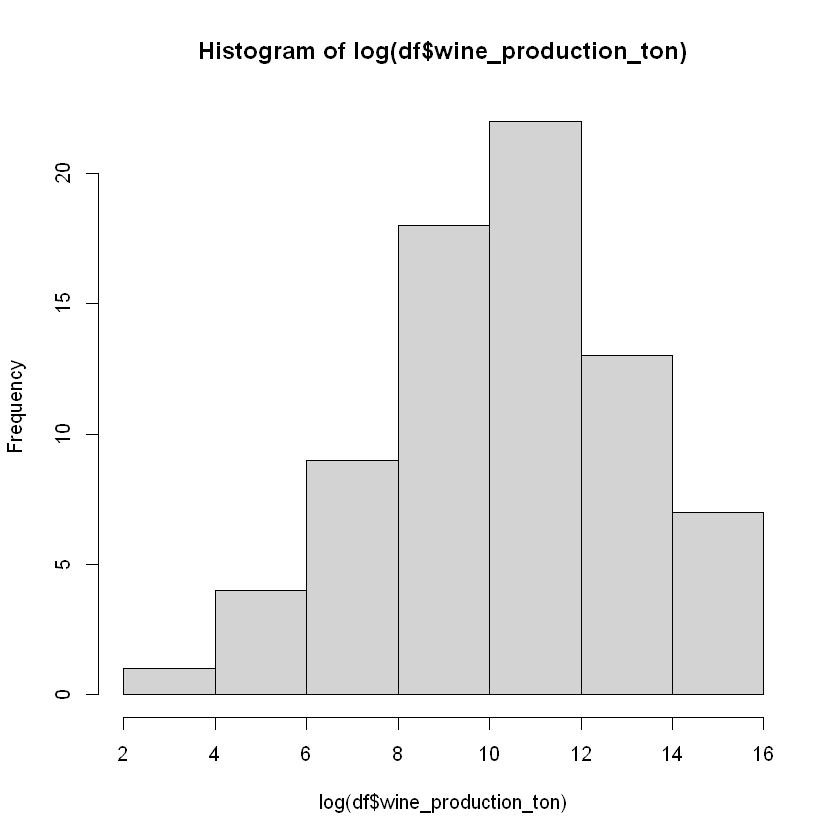

In [24]:
hist(log(df$wine_production_ton))

In [25]:
summary(log(df$wine_production_ton))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  3.892   8.952  10.545  10.354  12.203  15.383     162 

In [26]:
df$wine_production_cats <- factor(ifelse(is.na(df$wine_production_ton),0,
                               ifelse(log(df$wine_production_ton)  < 8.952, 1,
                               ifelse(log(df$wine_production_ton) < 10.545, 2,
                               ifelse(log(df$wine_production_ton) < 12.203, 3, 4)))))
table(df$wine_production_cats)


  0   1   2   3   4 
162  19  18  18  19 

## Impact Coding

In [27]:
regions <- levels(factor(df$region))
length(regions)
regions

[1] 23

[1] "—"                         "Australia and New Zealand"
 [3] "Caribbean"                 "Central America"          
 [5] "Central Asia"              "Eastern Africa"           
 [7] "Eastern Asia"              "Eastern Europe"           
 [9] "Melanesia"                 "Micronesia"               
[11] "Middle Africa"             "Northern Africa"          
[13] "Northern America"          "Northern Europe"          
[15] "Polynesia"                 "South-eastern Asia"       
[17] "South America"             "Southern Africa"          
[19] "Southern Asia"             "Southern Europe"          
[21] "Western Africa"            "Western Asia"             
[23] "Western Europe"

In [28]:
total <- nrow(df)
region_aggr <- df %>% group_by(region) %>% tally()
total
region_aggr

[1] 236

region,n
<chr>,<int>
—,1
Australia and New Zealand,2
Caribbean,26
Central America,8
Central Asia,5
Eastern Africa,20
Eastern Asia,8
Eastern Europe,10
Melanesia,5


In [29]:
region_aggr$region_pct <- region_aggr$n/total
region_aggr
sum(region_aggr$region_pct)

region,n,region_pct
<chr>,<int>,<dbl>
—,1,0.004237288
Australia and New Zealand,2,0.008474576
Caribbean,26,0.110169492
Central America,8,0.033898305
Central Asia,5,0.021186441
Eastern Africa,20,0.084745763
Eastern Asia,8,0.033898305
Eastern Europe,10,0.042372881
Melanesia,5,0.021186441


[1] 1

In [30]:
df <- left_join(df, region_aggr)
df

Joining, by = "region"



X1,country,continent,region,pop2018,pop2019,pop_change,rank,age_avg,male_age,...,alcohol_unreported,beer_pct,wine_pct,spirits_pct,other_pct,alcohol_projection_2015,temperature_avg,wine_production_cats,n,region_pct
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<dbl>
1,China,Asia,Eastern Asia,1427647786,1433783686,+0.4%,67,37.4,36.5,...,1.7,27.8,3.0,69.2,0.0,7.6,6.95,4,8,0.03389831
2,India,Asia,Southern Asia,1352642280,1366417754,+1.0%,141,28.1,27.2,...,2.2,6.8,0.1,93.1,0.0,4.6,23.65,0,9,0.03813559
3,United States,Americas,Northern America,327096265,329064917,+0.6%,61,38.1,36.8,...,0.5,50.0,17.3,32.7,0.0,9.0,47.39,4,5,0.02118644
4,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.1%,117,30.2,29.6,...,0.5,84.5,0.1,15.3,0.0,0.6,25.85,0,11,0.04661017
5,Pakistan,Asia,Southern Asia,212228286,216565318,+2.0%,168,23.8,23.7,...,0.0,1.2,3.0,0.1,0.1,NA,20.20,0,9,0.03813559
6,Brazil,Americas,South America,209469323,211049527,+0.8%,103,32.6,31.1,...,1.5,59.6,4.0,36.3,0.1,9.1,24.95,4,15,0.06355932
7,Brazil,Americas,South America,209469323,211049527,+0.8%,103,32.6,31.1,...,1.5,59.6,4.0,36.3,0.1,9.1,24.95,4,15,0.06355932
8,Nigeria,Africa,Western Africa,195874683,200963599,+2.6%,213,18.4,28.3,...,1.0,8.0,0.4,0.9,90.7,11.3,26.80,0,17,0.07203390
9,Bangladesh,Asia,Southern Asia,161376708,163046161,+1.0%,148,26.7,26.0,...,0.2,9.0,17.6,0.2,0.2,NA,25.00,0,9,0.03813559


## One-hot encoding and Dummy encoding

In [31]:
df$continent <- factor(df$continent)
continents <- levels(df$continent)
length(continents)
continents[1] <- 'Unknown'
continents

[1] 6

[1] "Unknown"  "Africa"   "Americas" "Asia"     "Europe"   "Oceania"

In [33]:
levels(df$continent) <- continents
summary(df$continent)

Unknown   Africa Americas     Asia   Europe  Oceania 
       1       59       54       51       48       23

In [34]:
summary(df$continent)

Unknown   Africa Americas     Asia   Europe  Oceania 
       1       59       54       51       48       23

In [36]:
one_hot_encode <- function(df,var) {
    df[[var]] <- factor(df[[var]])
    for (l in levels(df[[var]])) {
        df[[paste(var,l,sep="_")]] <- ifelse(df[[var]]==l,1,0)
    }
    return(df)
}

In [38]:
df <- one_hot_encode(df,"continent")
head(df)

X1,country,continent,region,pop2018,pop2019,pop_change,rank,age_avg,male_age,...,temperature_avg,wine_production_cats,n,region_pct,continent_Unknown,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
<dbl>,<chr>,<fct>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,...,<dbl>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,China,Asia,Eastern Asia,1427647786,1433783686,+0.4%,67,37.4,36.5,...,6.95,4,8,0.03389831,0,0,0,1,0,0
2,India,Asia,Southern Asia,1352642280,1366417754,+1.0%,141,28.1,27.2,...,23.65,0,9,0.03813559,0,0,0,1,0,0
3,United States,Americas,Northern America,327096265,329064917,+0.6%,61,38.1,36.8,...,47.39,4,5,0.02118644,0,0,1,0,0,0
4,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.1%,117,30.2,29.6,...,25.85,0,11,0.04661017,0,0,0,1,0,0
5,Pakistan,Asia,Southern Asia,212228286,216565318,+2.0%,168,23.8,23.7,...,20.20,0,9,0.03813559,0,0,0,1,0,0
6,Brazil,Americas,South America,209469323,211049527,+0.8%,103,32.6,31.1,...,24.95,4,15,0.06355932,0,0,1,0,0,0


In [12]:
countries <- levels(factor(df$country))
length(countries)
countries

[1] 234

[1] "Afghanistan"                                 
  [2] "Albania"                                     
  [3] "Algeria"                                     
  [4] "American Samoa"                              
  [5] "Andorra"                                     
  [6] "Angola"                                      
  [7] "Anguilla"                                    
  [8] "Antigua and Barbuda"                         
  [9] "Argentina"                                   
 [10] "Armenia"                                     
 [11] "Aruba"                                       
 [12] "Australia"                                   
 [13] "Austria"                                     
 [14] "Azerbaijan"                                  
 [15] "Bahamas"                                     
 [16] "Bahrain"                                     
 [17] "Bangladesh"                                  
 [18] "Barbados"                                    
 [19] "Belarus"                                     
 [20] "Belgium"                                     
 [21] "Belize"                                      
 [22] "Benin"                                       
 [23] "Bermuda"                                     
 [24] "Bhutan"                                      
 [25] "Bolivia"                                     
 [26] "Bosnia and Herzegovina"                      
 [27] "Botswana"                                    
 [28] "Brazil"                                      
 [29] "British Virgin Islands"                      
 [30] "Brunei"                                      
 [31] "Bulgaria"                                    
 [32] "Burkina Faso"                                
 [33] "Burundi"                                     
 [34] "Cambodia"                                    
 [35] "Cameroon"                                    
 [36] "Canada"                                      
 [37] "Cape Verde"                                  
 [38] "Caribbean Netherlands"                       
 [39] "Cayman Islands"                              
 [40] "Central African Republic"                    
 [41] "Chad"                                        
 [42] "Chile"                                       
 [43] "China"                                       
 [44] "Colombia"                                    
 [45] "Comoros"                                     
 [46] "Congo"                                       
 [47] "Cook Islands"                                
 [48] "Costa Rica"                                  
 [49] "Croatia"                                     
 [50] "Cuba"                                        
 [51] "Curacao"                                     
 [52] "Cyprus"                                      
 [53] "Czech Republic"                              
 [54] "Democratic Republic of the Congo"            
 [55] "Denmark"                                     
 [56] "Djibouti"                                    
 [57] "Dominica"                                    
 [58] "Dominican Republic"                          
 [59] "East Timor"                                  
 [60] "Ecuador"                                     
 [61] "Egypt"                                       
 [62] "El Salvador"                                 
 [63] "Equatorial Guinea"                           
 [64] "Eritrea"                                     
 [65] "Estonia"                                     
 [66] "Eswatini (Swaziland)"                        
 [67] "Ethiopia"                                    
 [68] "Falkland Islands"                            
 [69] "Faroe Islands"                               
 [70] "Federated States of Micronesia"              
 [71] "Fiji"                                        
 [72] "Finland"                                     
 [73] "France"                                      
 [74] "French Guiana"                               
 [75] "French Polynesia"                            
 [76] "Gabon"              

## Substitute large categorical variables by their rank

In [51]:
df %>% arrange(desc(pop2018)) %>% mutate(pop_rank=1:nrow(df))

X1,country,continent,region,pop2018,pop2019,pop_change,rank,age_avg,male_age,...,n,region_pct,continent_Unknown,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania,pop_change2,pop_rank
<dbl>,<chr>,<fct>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,...,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,China,Asia,Eastern Asia,1427647786,1433783686,+0.4%,67,37.4,36.5,...,8,0.03389831,0,0,0,1,0,0,1.0042979,1
2,India,Asia,Southern Asia,1352642280,1366417754,+1.0%,141,28.1,27.2,...,9,0.03813559,0,0,0,1,0,0,1.0101841,2
3,United States,Americas,Northern America,327096265,329064917,+0.6%,61,38.1,36.8,...,5,0.02118644,0,0,1,0,0,0,1.0060186,3
4,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.1%,117,30.2,29.6,...,11,0.04661017,0,0,0,1,0,0,1.0110398,4
5,Pakistan,Asia,Southern Asia,212228286,216565318,+2.0%,168,23.8,23.7,...,9,0.03813559,0,0,0,1,0,0,1.0204357,5
6,Brazil,Americas,South America,209469323,211049527,+0.8%,103,32.6,31.1,...,15,0.06355932,0,0,1,0,0,0,1.0075438,6
7,Brazil,Americas,South America,209469323,211049527,+0.8%,103,32.6,31.1,...,15,0.06355932,0,0,1,0,0,0,1.0075438,7
8,Nigeria,Africa,Western Africa,195874683,200963599,+2.6%,213,18.4,28.3,...,17,0.07203390,0,1,0,0,0,0,1.0259805,8
9,Bangladesh,Asia,Southern Asia,161376708,163046161,+1.0%,148,26.7,26.0,...,9,0.03813559,0,0,0,1,0,0,1.0103451,9


In [15]:
df$pop_change

[1] "+0.4%" "+1.0%" "+0.6%" "+1.1%" "+2.0%" "+0.8%" "+0.8%" "+2.6%" "+1.0%"
 [10] "+0.1%" "+1.1%" "-0.3%" "+2.6%" "+1.4%" "+2.0%" "+1.0%" "+3.2%" "+0.5%"
 [19] "+1.3%" "+1.4%" "+0.3%" "+0.6%" "+0.2%" "-0.1%" "+1.3%" "+3.0%" "+0.6%"
 [28] "+2.3%" "+0.1%" "+1.4%" "+0.1%" "+0.9%" "+3.6%" "-0.6%" "+2.0%" "+2.0%"
 [37] "+2.4%" "+2.3%" "+2.3%" "-0.1%" "+0.9%" "+1.2%" "+1.7%" "+1.6%" "+1.6%"
 [46] "+1.3%" "+3.3%" "+2.9%" "+2.3%" "+2.2%" "+1.8%" "-1.3%" "+2.7%" "+0.5%"
 [55] "+2.6%" "+2.6%" "+1.2%" "+0.2%" "+3.9%" "+0.4%" "+2.9%" "+3.0%" "-0.7%"
 [64] "+2.7%" "+1.2%" "+1.3%" "+2.9%" "+1.9%" "+1.7%" "+0.2%" "+0.7%" "+1.5%"
 [73] "+2.8%" "+3.0%" "+2.9%" "+1.4%" "+2.9%" "+2.6%" "+2.8%" "+1.1%" "+0.5%"
 [82] "+1.4%" "0.0%"  "+1.3%" "+0.8%" "+3.2%" "+1.1%" "+0.2%" "-0.5%" "-0.3%"
 [91] "+1.4%" "+1.0%" "+0.6%" "+1.4%" "+1.7%" "-0.2%" "0.0%"  "+2.4%" "+0.7%"
[100] "+2.0%" "-0.3%" "+0.8%" "+1.6%" "+2.4%" "+2.1%" "+0.9%" "+1.5%" "+1.3%"
[109] "-0.7%" "-0.1%" "+1.5%" "+1.2%" "+0.5%" "+1.8%" "+1.6%" "+0.8%" "+0.3%"
[118] "+0.2%" "+0.1%" "+2.6%" "+0.8%" "+1.0%" "+2.4%" "+3.0%" "+2.5%" "+1.3%"
[127] "+0.8%" "+1.7%" "+2.8%" "+1.7%" "+1.7%" "-0.6%" "-0.2%" "-0.2%" "+1.3%"
[136] "+0.4%" "-0.7%" "+1.7%" "+0.2%" "+0.5%" "-3.5%" "-0.1%" "+1.8%" "-1.5%"
[145] "+1.9%" "+3.0%" "+2.2%" "+2.5%" "+0.8%" "0.0%"  "0.0%"  "+2.5%" "-1.1%"
[154] "+4.6%" "+0.4%" "+3.6%" "+0.2%" "+2.0%" "+0.8%" "+0.8%" "+1.0%" "+1.5%"
[163] "+0.7%" "+0.7%" "+2.2%" "+0.5%" "+1.2%" "+2.6%" "+1.4%" "0.0%"  "+1.9%"
[172] "+2.7%" "+0.9%" "+1.1%" "+3.0%" "+0.2%" "+0.3%" "+1.0%" "+1.9%" "+1.0%"
[181] "0.0%"  "+0.7%" "+2.5%" "+0.1%" "+1.0%" "+2.5%" "+0.6%" "+2.6%" "+1.9%"
[190] "+0.5%" "+0.5%" "+1.0%" "+0.9%" "+0.4%" "+1.5%" "+1.0%" "+0.5%" "+0.3%"
[199] "+0.3%" "+0.4%" "-0.1%" "+0.7%" "+0.9%" "+0.6%" "+0.2%" "+0.3%" "+1.2%"
[208] "-0.4%" "+0.6%" "+0.2%" "-1.2%" "-0.3%" "+0.7%" "+0.4%" "+1.1%" "+0.7%"
[217] "+1.4%" "+0.3%" "+0.2%" "-0.1%" "+0.8%" "+1.0%" "+0.6%" "+0.2%" "+0.9%"
[226] "+1.2%" "-2.0%" "+0.8%" "+0.4%" "-0.5%" "-0.1%" "+4.4%" "-0.3%" "+1.6%"
[235] "-0.2%" "+1.1%"

In [16]:
df$unemployment_last_period

[1] "Sep/19" "Oct/19" "Oct/19" "Sep/19" "Dec/17" "Oct/19" "Oct/19" "Sep/18"
  [9] "Dec/18" "Oct/19" "Oct/19" "Oct/19" "Dec/18" "Sep/19" "Sep/19" "Sep/19"
 [17] NA       "Oct/19" "Aug/19" "Jun/19" "Oct/19" "Sep/19" "Sep/19" "Oct/19"
 [25] "Sep/19" "Dec/18" "Dec/18" "Dec/18" "Oct/19" "Sep/19" "Sep/19" "Jun/19"
 [33] "Dec/17" "Jun/19" "Sep/18" "Sep/18" "Dec/18" "Dec/17" "Dec/18" "Oct/19"
 [41] "Oct/19" "Sep/19" "Jun/19" "Dec/18" "Oct/19" "Sep/19" "Sep/19" "Dec/17"
 [49] "Dec/18" "Dec/18" "Dec/17" "Dec/18" "Dec/18" "Dec/17" "Dec/18" "Dec/18"
 [57] "Oct/19" "Oct/19" "Dec/18" "Jun/19" "Dec/18" "Dec/18" "Oct/19" "Dec/18"
 [65] "Oct/19" "Oct/19" "Dec/19" "Sep/18" "Sep/19" "Oct/19" "Dec/18" "Dec/17"
 [73] "Dec/18" "Dec/17" NA       "Dec/18" "Dec/18" "Aug/19" "Dec/18" "Sep/19"
 [81] "Sep/19" "Dec/17" "Dec/18" "Dec/17" NA       "Dec/18" "Jun/19" "Oct/19"
 [89] "Aug/19" "Sep/19" "Jun/19" "Dec/18" "Oct/19" "Dec/18" "Dec/18" "Oct/19"
 [97] "Sep/19" "Sep/18" "Oct/19" "Dec/18" "Sep/19" "Oct/19" "Oct/19" "Dec/18"
[105] "Dec/18" "Oct/19" "Dec/18" "Sep/19" "Sep/19" "Dec/18" "Dec/18" "Dec/18"
[113] "Dec/18" "Aug/19" "Dec/18" "Sep/19" "Oct/19" "Oct/19" "Oct/19" "Dec/13"
[121] "Sep/19" "Sep/19" "Sep/19" "Dec/17" "Dec/18" "Oct/19" "Sep/19" "Dec/18"
[129] "Dec/17" "Dec/18" "Dec/18" "Oct/19" "Jun/19" "Dec/18" "Dec/18" "Sep/19"
[137] "Sep/19" "Sep/19" "Jun/19" "Sep/19" "Oct/19" "Jun/19" "Jun/19" "Oct/19"
[145] "Dec/18" NA       "Dec/18" "Dec/18" "Dec/18" NA       "Sep/19" NA      
[153] "Sep/19" "Dec/18" "Jun/18" "Dec/18" "Sep/19" "Dec/17" "Jun/19" "Oct/19"
[161] NA       NA       "Dec/18" NA       "Dec/18" "Dec/17" "Dec/17" NA      
[169] "Oct/19" "Oct/19" "Oct/19" NA       "Dec/17" "Dec/18" "Dec/18" NA      
[177] "Jun/19" "Dec/18" "Dec/18" "Dec/18" NA       "Oct/19" NA       "Jun/19"
[185] "Dec/18" NA       NA       NA       "Dec/18" NA       NA       NA      
[193] NA       NA       NA       NA       NA       NA       NA       NA      
[201] NA       "Dec/18" NA       NA       NA       NA       "Dec/18" NA      
[209] NA       NA       NA       NA       NA       "Aug/19" NA       NA      
[217] NA       "Dec/18" NA       NA       NA       NA       NA       NA      
[225] NA       NA       NA       NA       NA       NA       NA       NA      
[233] NA       NA       NA       NA

In [18]:
df$unemployment_range

[1] "4.3 : 3.61"    "8.5 : 6.7"     "10.8 : 2.5"    "11.24 : 2"    
  [5] "7.8 : 3.1"     "13.7 : 6.2"    "13.7 : 6.2"    "23.1 : 5.1"   
  [9] "5.1 : 2.2"     "14.1 : 4.3"    "6.42 : 2.22"   "5.5 : 1"      
 [13] "26.4 : 16.8"   "13.9 : 4.7"    "13.4 : 7.5"    "4.5 : 1.81"   
 [17] NA              "11.5 : 0.4"    "14.8 : 7.3"    "14.7 : 9.5"   
 [21] "5.73 : 0.39"   "12 : 3.4"      "10.7 : 7.2"    "13.1 : 5.8"   
 [25] "30.4 : 21.5"   "12.9 : 9.7"    "4.17 : 0.8"    "12.2 : 9.3"   
 [29] "7.1 : 3"       "17.87 : 7.3"   "26.94 : 4.41"  "20.8 : 5.9"   
 [33] "3.5 : 0.94"    "10.6 : 6.3"    "29.5 : 9.8"    "29.5 : 9.8"   
 [37] "14.2 : 12.7"   "28.1 : 14.8"   "12.4 : 6.7"    "20.7 : 0.3"   
 [41] "13.1 : 2.9"    "15.1 : 7.8"    "6.3 : 4.35"    "8.3 : 6.3"    
 [45] "13 : 5.6"      "4.5 : 2.7"     "35 : 19.9"     "25.3 : 22.55" 
 [49] "17.8 : 8.3"    "10.4 : 4.6"    "4.5 : 1.9"     "20.7 : 5.5"   
 [53] "5.8 : 0.6"     "6.4 : 4.2"     "7.3 : 2.5"     "8.1 : 3.1"    
 [57] "11.2 : 4"      "6.02 : 1.04"   "5.1 : 0.3"     "16.6 : 3.7"   
 [61] "6.7 : 2.4"     "11.7 : 3.1"    "8.7 : 3.8"     "7.8 : 5.4"    
 [65] "13.5 : 5.1"    "9.7 : 4.8"     "19.7 : 7.15"   "4.13 : 2"     
 [69] "11.86 : 4.54"  "7.9 : 3.3"     "15.2 : 2.3"    "2.5 : 0.1"    
 [73] "25.7 : 5.6"    "6.03 : 5.57"   NA              "10.8 : 4.17"  
 [77] "4.5 : 3.6"     "17.8 : 1"      "2.7 : 0.7"     "18.9 : 12.4"  
 [81] "11 : 5.5"      "6 : 2.1"       "9.7 : 1.6"     "23.9 : 7"     
 [85] NA              "2.1 : 1.5"     "19.7 : 5.1"    "9.69 : 0.09"  
 [89] "27.8 : 7.3"    "17.5 : 3.7"    "19.2 : 10.8"   "11.8 : 4.5"   
 [93] "10.5 : 1.3"    "4.2 : 1.15"    "12.1 : 3"      "11.8 : 3.3"   
 [97] "4 : 0.3"       "3.13 : 2"      "10.9 : 0.8"    "2.9 : 2.4"    
[101] "25.5 : 9.5"    "5.7 : 1.5"     "11.4 : 3.4"    "2.4 : 1.6"    
[105] "4.7 : 3.4"     "8.5 : 1"       "2.6 : 0.6"     "9.2 : 5.2"    
[109] "19.27 : 4.68"  "9.1 : 6.1"     "21.1 : 16.1"   "17.8 : 1.6"   
[113] "7.97 : 5.88"   "3.5 : 2.2"     "9.29 : 3.3"    "6 : 1.4"      
[117] "6.2 : 2.4"     "19.9 : 0.7"    "19.79 : 4.88"  "66.9 : 45.4"  
[121] "5.1 : 2.4"     "12 : 8.3"      "35.6 : 8.8"    "19.8 : 15.8"  
[125] "15.9 : 2"      "17.3 : 3.9"    "11.2 : 3.3"    "7.7 : 6.4"    
[129] "19.1 : 9.85"   "16.3 : 4.2"    "3.6 : 0.5"     "23.6 : 6.7"   
[133] "13 : 2.2"      "18.3 : 10.3"   "7 : 6.1"       "13.4 : 5.4"   
[137] "46.1 : 32.9"   "11.8 : 2.8"    "21.9 : 6.3"    "16.5 : 7.8"   
[141] "25.3 : 7"      "22.3 : 12"     "3.9 : 0.1"     "15.3 : 2.7"   
[145] "37.6 : 19.5"   NA              "26.2 : 13.9"   "20.4 : 16.9"  
[149] "44.16 : 22.96" NA              "15.5 : 6.3"    NA             
[153] "21.3 : 5.3"    "16 : 3.1"      "21.1 : 3.1"    "9.3 : 1.3"    
[157] "19.5 : 0.5"    "9.9 : 3.2"     "19.7 : 2.7"    "16.8 : 3"     
[161] NA              NA              "9.4 : 3.6"     NA             
[165] "4.7 : 3.7"     "16.8 : 10.3"   "4 : 1.15"      NA             
[169] "7.1 : 1.7"     "31 : 10.2"     "7.2 : 1.4"     NA             
[173] "17 : 5.5"      "21.4 : 10.7"   "6.1 : 0.8"     NA             
[177] "8.24 : 3.4"    "9.3 : 4.7"     "23.3 : 8"      "15.7 : 6.9"   
[181] NA              "9.1 : 0.1"     NA              "13.2 : 7.6"   
[185] "19.2 : 11.6"   NA              NA              NA             
[189] "17.6 : 13.1"   NA              NA              NA             
[193] NA              NA              NA              NA             
[197] NA              NA              NA              NA             
[201] NA              "4.7 : 1"       NA              NA             
[205] NA              NA              "7.5 : 2.6"     NA             
[209] NA              NA              NA              NA             
[213] NA              "14.3 : 1.1"    NA              NA             
[217] NA              "3.2 : 1.7"     NA              NA             
[221] NA              NA              NA              NA             
[225] NA              NA              NA              NA             
[229] NA    

In [19]:
df$data_date

[1] "2011"  "2011"  "2011"  "2011"  "2011"  "2011"  "2011"  "2011"  "2011" 
 [10] "2011"  "2011"  "2011"  "2011"  "2011"  "2011"  "2011"  NA      "2011" 
 [19] "2011"  "2011"  "2011"  "2011"  "2011"  "2011"  "2011"  "2011"  "2011" 
 [28] "2011"  NA      "2011"  "2011"  "2011"  NA      "2011"  "2011"  "2011" 
 [37] "2011"  "2011"  "2011"  "2011"  "2011"  "2011"  "2011"  "2011"  "2011" 
 [46] NA      "2011"  "2011"  "2011"  "2011"  "2011"  "2011"  "2011"  NA     
 [55] NA      "2011"  "2011"  NA      "2011"  "2011"  "2011"  "2011"  "2011" 
 [64] "2011"  "2011"  "2011"  "2011"  "2011"  "2011"  "2011"  "2011"  "2011" 
 [73] "2011"  "2011"  "2011"  "2011"  "2011"  "2011"  "2011"  "2011"  "2011" 
 [82] "2011"  "2011"  "2011"  NA      "2011"  "2011"  "2011"  "2011"  "2011" 
 [91] "2011"  "2011"  "2011"  "2011"  "2011"  "2011"  "2011"  "2011"  "2011" 
[100] "2011"  "2011*" "2011"  "2011"  "2011"  "2011"  NA      "2011"  "2011" 
[109] "2011"  "2011"  "2011"  "2011"  "2011"  "2011"  "2011"  "2011"  "2011" 
[118] "2011"  "2011"  NA      "2011"  "2011"  NA      "2011"  "2011"  "2011" 
[127] "2011"  "2011"  "2011"  "2011"  "2011"  "2011"  "2011"  "2011"  "2011" 
[136] "2011"  "2011"  "2011"  "2011"  "2011"  NA      "2011"  "2011"  "2011" 
[145] "2011"  NA      "2011"  "2011"  "2011"  NA      "2011"  "2011"  "2011" 
[154] "2011"  "2011"  "2011"  "2011"  NA      "2011"  "2011"  NA      "2011" 
[163] "2011"  NA      "2011"  "2011"  "2011"  "2011"  NA      NA      "2011" 
[172] NA      "2011"  "2011"  "2011"  NA      "2011"  "2011"  "2011"  "2011" 
[181] NA      "2011"  NA      "2011"  NA      NA      NA      NA      NA     
[190] NA      NA      NA      NA      NA      NA      NA      NA      NA     
[199] NA      NA      NA      NA      "2011"  NA      NA      NA      NA     
[208] NA      NA      NA      NA      NA      "2011"  NA      NA      NA     
[217] NA      NA      NA      NA      NA      NA      NA      NA      NA     
[226] NA      NA      NA      NA      NA      NA      NA      NA      NA     
[235] NA      NA

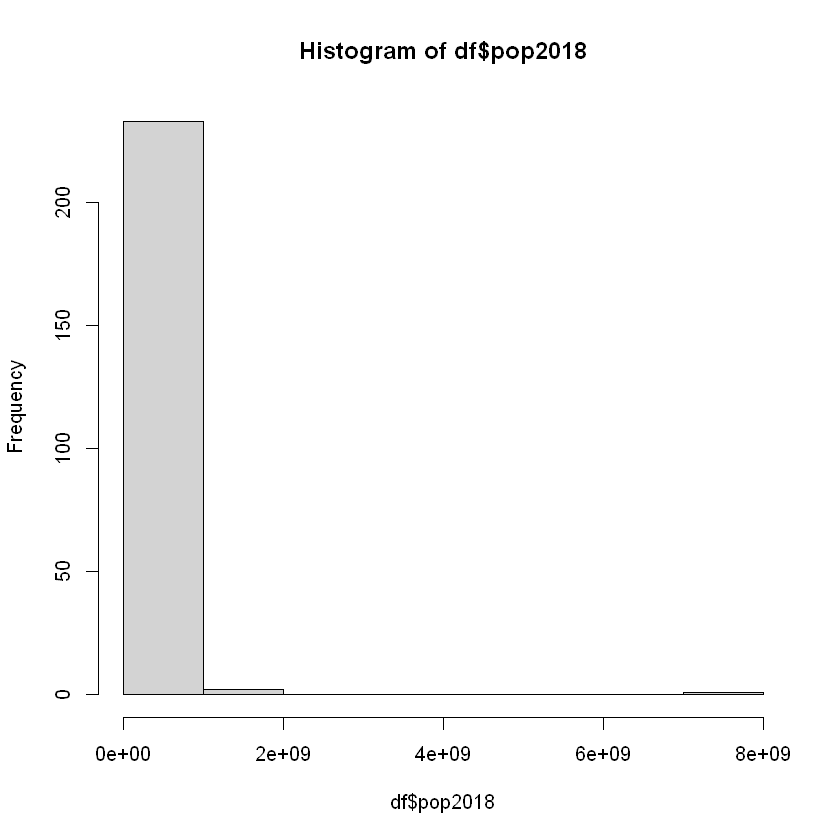

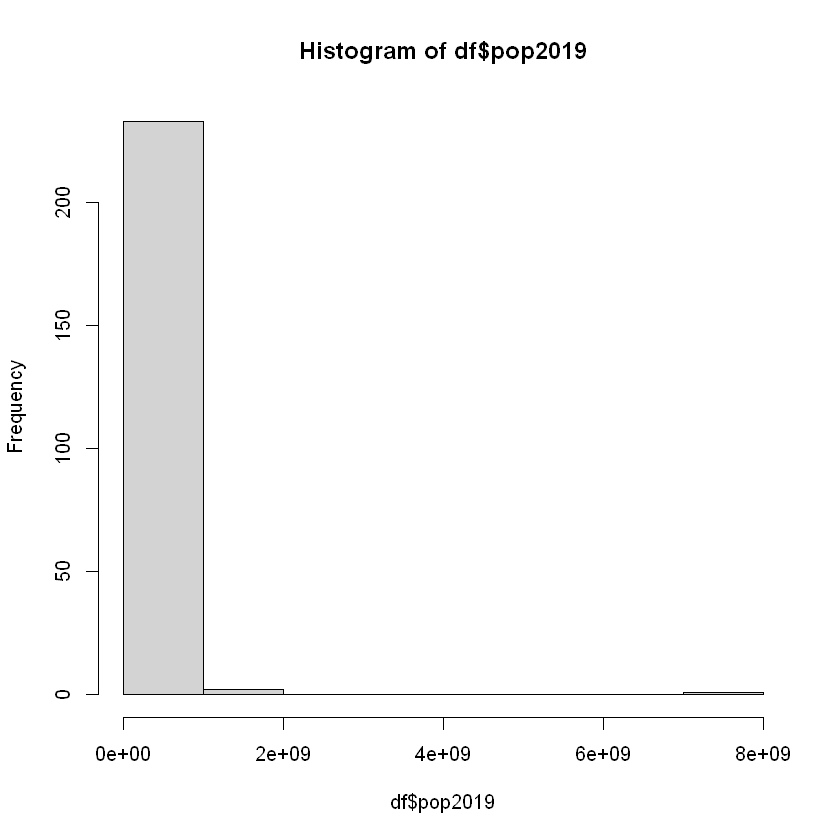

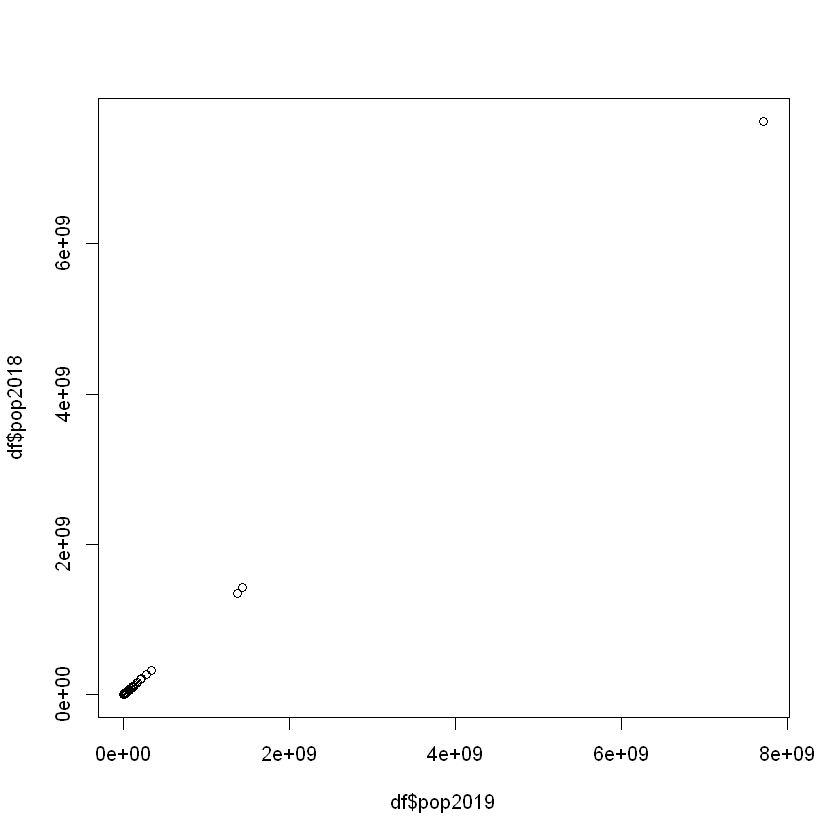

In [39]:
hist(df$pop2018)
hist(df$pop2019)

plot(df$pop2018 ~ df$pop2019)

In [40]:
df %>% arrange(desc(pop2018))

X1,country,continent,region,pop2018,pop2019,pop_change,rank,age_avg,male_age,...,temperature_avg,wine_production_cats,n,region_pct,continent_Unknown,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
<dbl>,<chr>,<fct>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,...,<dbl>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
236,World,Unknown,—,7631091040,7713468100,+1.1%,115,30.4,29.6,...,NA,0,1,0.004237288,1,0,0,0,0,0
1,China,Asia,Eastern Asia,1427647786,1433783686,+0.4%,67,37.4,36.5,...,6.95,4,8,0.033898305,0,0,0,1,0,0
2,India,Asia,Southern Asia,1352642280,1366417754,+1.0%,141,28.1,27.2,...,23.65,0,9,0.038135593,0,0,0,1,0,0
3,United States,Americas,Northern America,327096265,329064917,+0.6%,61,38.1,36.8,...,47.39,4,5,0.021186441,0,0,1,0,0,0
4,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.1%,117,30.2,29.6,...,25.85,0,11,0.046610169,0,0,0,1,0,0
5,Pakistan,Asia,Southern Asia,212228286,216565318,+2.0%,168,23.8,23.7,...,20.20,0,9,0.038135593,0,0,0,1,0,0
6,Brazil,Americas,South America,209469323,211049527,+0.8%,103,32.6,31.1,...,24.95,4,15,0.063559322,0,0,1,0,0,0
7,Brazil,Americas,South America,209469323,211049527,+0.8%,103,32.6,31.1,...,24.95,4,15,0.063559322,0,0,1,0,0,0
8,Nigeria,Africa,Western Africa,195874683,200963599,+2.6%,213,18.4,28.3,...,26.80,0,17,0.072033898,0,1,0,0,0,0


In [41]:
### filter "World"

df <- df %>% filter(country!="World")

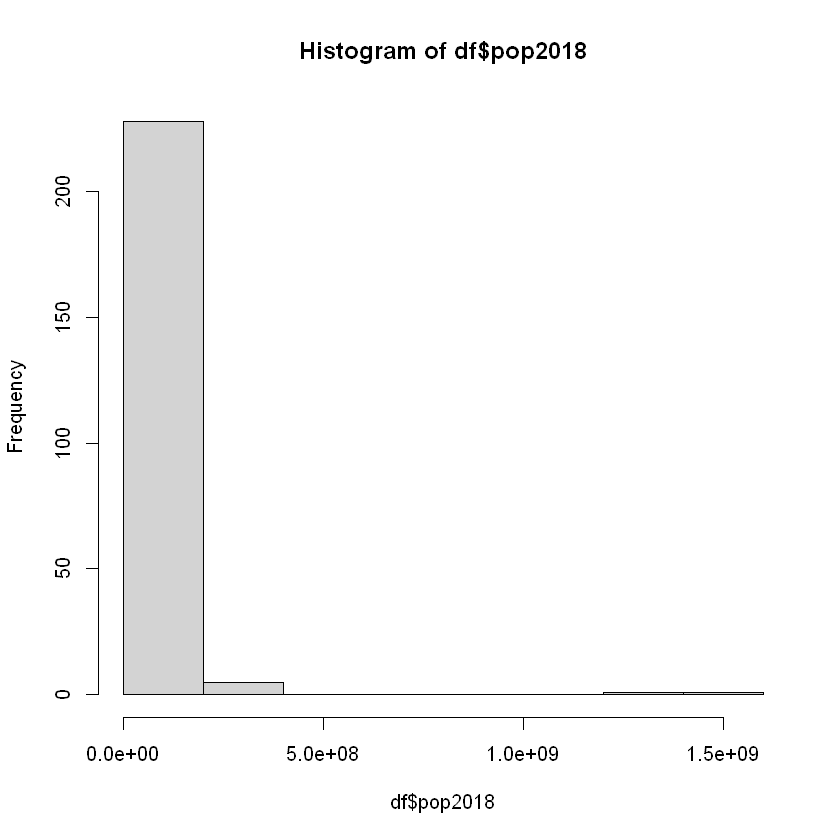

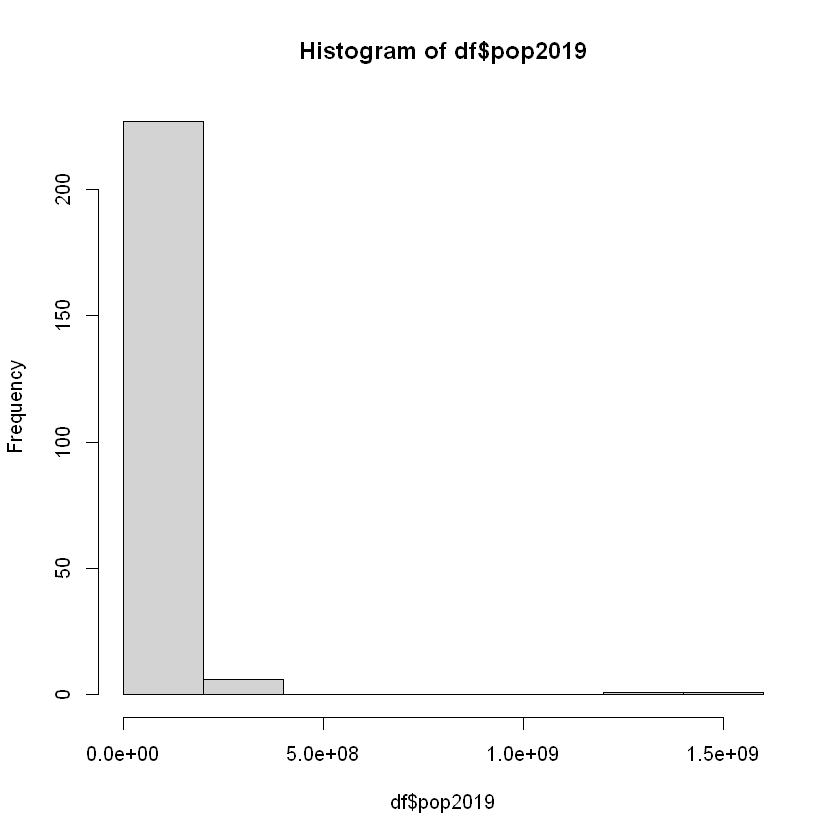

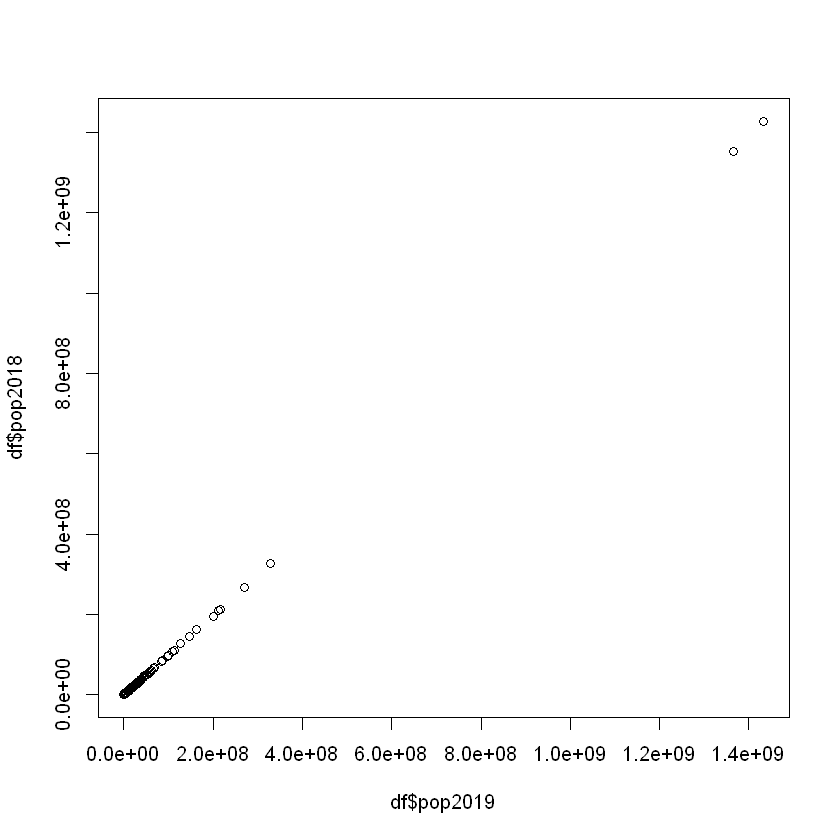

In [42]:
hist(df$pop2018)
hist(df$pop2019)

plot(df$pop2018 ~ df$pop2019)

## Transformations

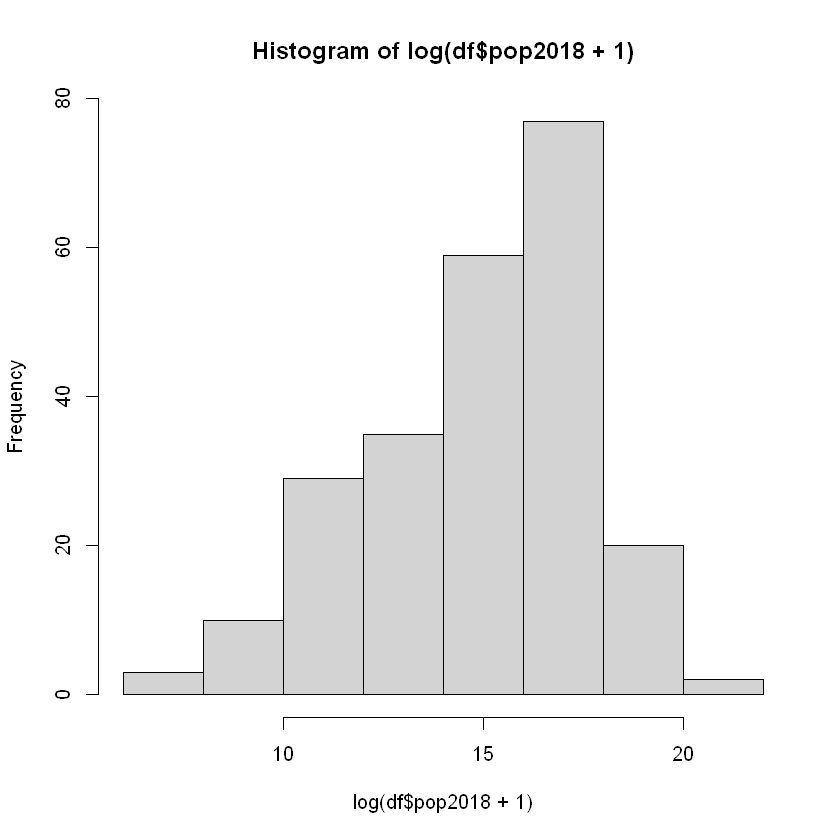

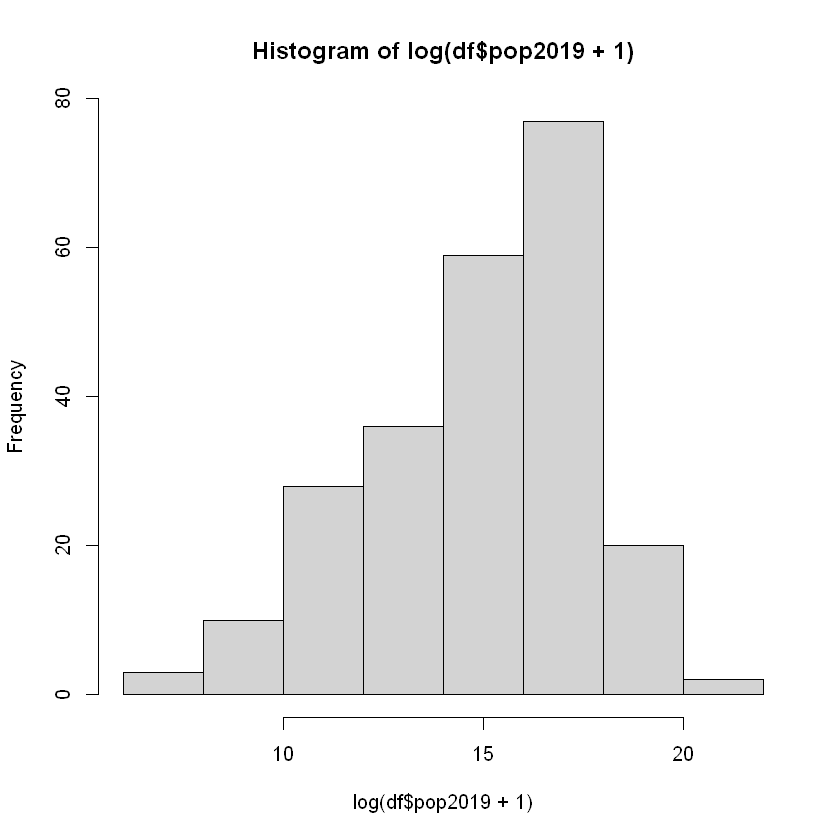

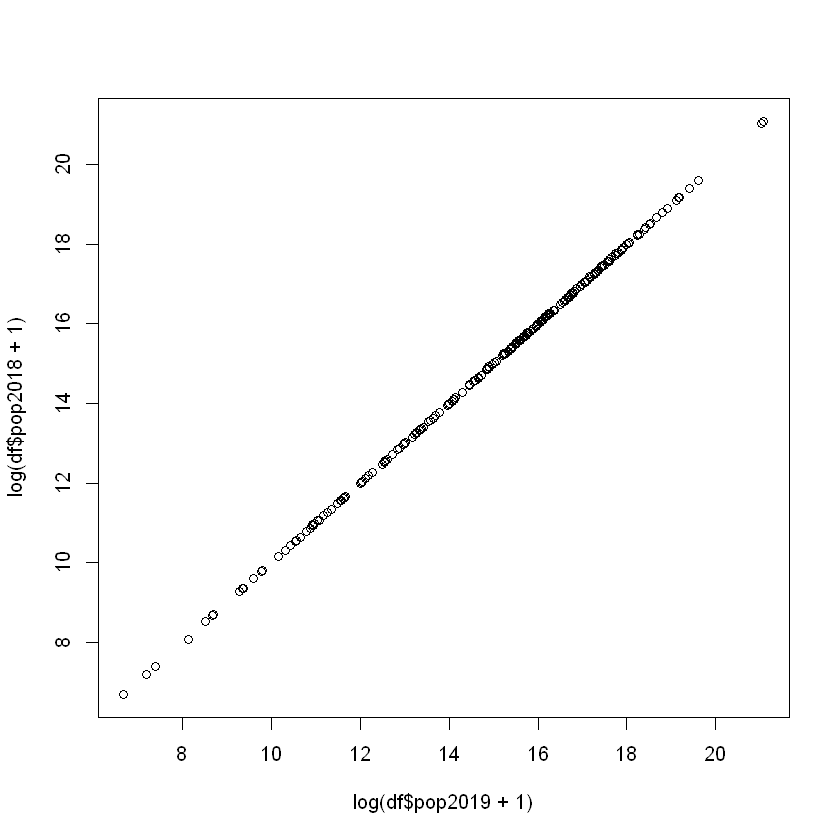

In [44]:
hist(log(df$pop2018+1))
hist(log(df$pop2019+1))

plot(log(df$pop2018+1) ~ log(df$pop2019+1))

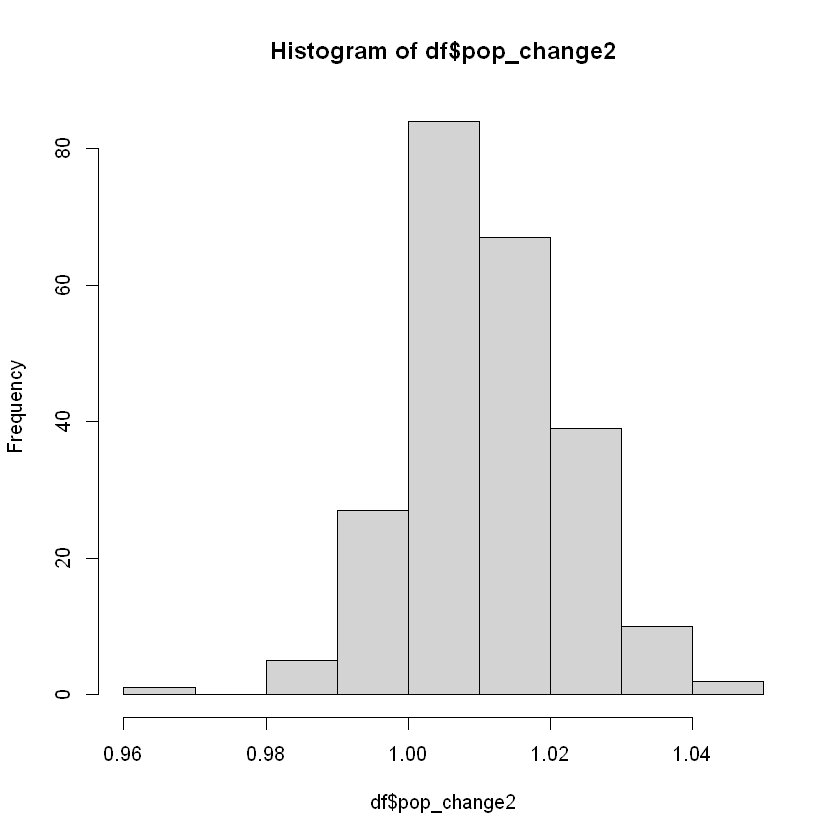

In [47]:
df$pop_change2 <- df$pop2019/df$pop2018

hist(df$pop_change2)

In [48]:
head(df)

X1,country,continent,region,pop2018,pop2019,pop_change,rank,age_avg,male_age,...,wine_production_cats,n,region_pct,continent_Unknown,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania,pop_change2
<dbl>,<chr>,<fct>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,...,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,China,Asia,Eastern Asia,1427647786,1433783686,+0.4%,67,37.4,36.5,...,4,8,0.03389831,0,0,0,1,0,0,1.004298
2,India,Asia,Southern Asia,1352642280,1366417754,+1.0%,141,28.1,27.2,...,0,9,0.03813559,0,0,0,1,0,0,1.010184
3,United States,Americas,Northern America,327096265,329064917,+0.6%,61,38.1,36.8,...,4,5,0.02118644,0,0,1,0,0,0,1.006019
4,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.1%,117,30.2,29.6,...,0,11,0.04661017,0,0,0,1,0,0,1.011040
5,Pakistan,Asia,Southern Asia,212228286,216565318,+2.0%,168,23.8,23.7,...,0,9,0.03813559,0,0,0,1,0,0,1.020436
6,Brazil,Americas,South America,209469323,211049527,+0.8%,103,32.6,31.1,...,4,15,0.06355932,0,0,1,0,0,0,1.007544
